In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,roc_curve, auc

In [ ]:

file_path = '/content/preprocessed_train_dataset.csv'
df = pd.read_csv(file_path)

In [ ]:

X = df.drop(columns=['Customer_ID', 'cluster_category','outliers_luxury','outliers_fresh','outliers_dry','outlet_city'])  # Features
y = df['cluster_category']

In [ ]:
#Train-Test Split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:

y_pred = rf_model.predict(X_test)

In [ ]:

accuracy = (accuracy_score(y_test, y_pred))
print(f'Model Accuracy: {accuracy:.3f}')

Model Accuracy: 0.999


In [ ]:
class_report = classification_report(y_test, y_pred)
print(f'Class report: \n{class_report}')

Class report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     37797
           2       1.00      1.00      1.00     31013
           3       1.00      1.00      1.00      9781
           4       1.00      1.00      1.00     34488
           5       1.00      1.00      1.00      7908
           6       1.00      1.00      1.00     33843

    accuracy                           1.00    154830
   macro avg       1.00      1.00      1.00    154830
weighted avg       1.00      1.00      1.00    154830



In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Conf matrix: \n{conf_matrix}')

Conf matrix: 
[[37780     1     1    14     0     1]
 [    0 31002     1     1     0     9]
 [    1     0  9778     1     1     0]
 [   20     0     2 34464     2     0]
 [    2     0    17     1  7886     2]
 [    1    26     3     2     1 33810]]


<ipython-input-15-ed85ca9bf388>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


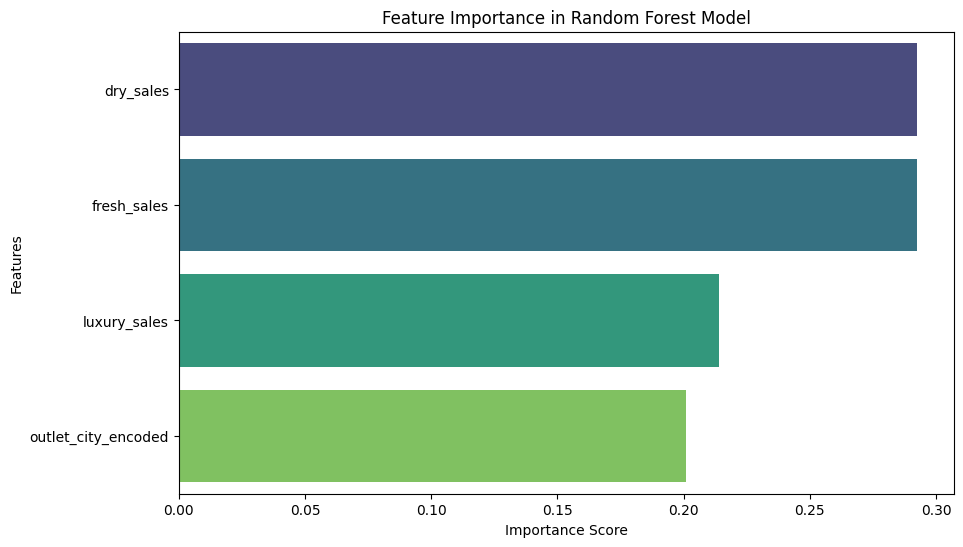

,Feature,Importance
2,dry_sales,0.292434
1,fresh_sales,0.292331
0,luxury_sales,0.214094
3,outlet_city_encoded,0.201141


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Feature importance analysis
feature_importances = rf_model.feature_importances_
feature_names = X.columns


importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

importance_df

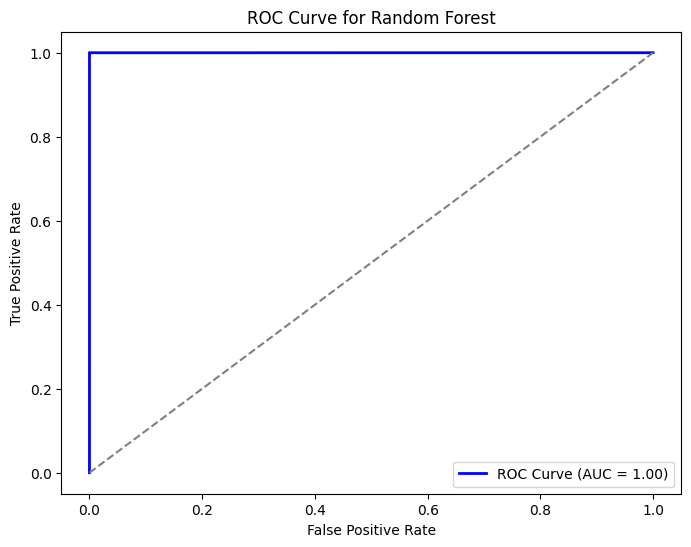

In [ ]:
# Generate ROC Curve
y_scores = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores, pos_label=rf_model.classes_[1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()

In [ ]:

import joblib
joblib.dump(rf_model, 'optimized_rf_model.pkl')
print("Optimized model saved successfully!")

Optimized model saved successfully!


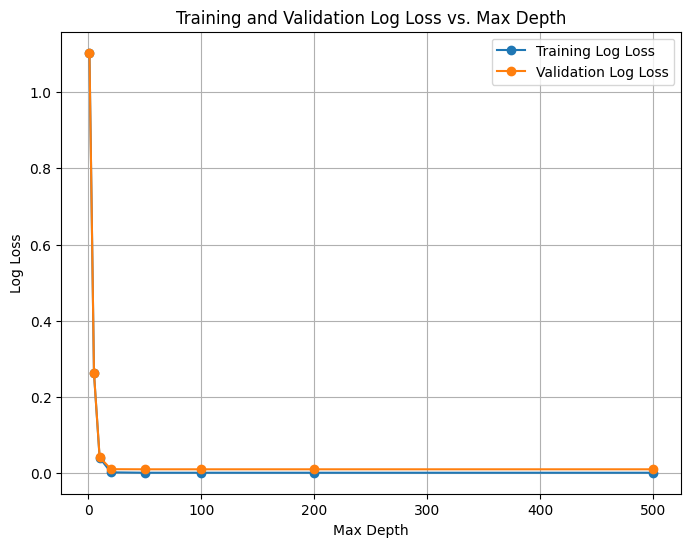

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss


depths = [1, 5, 10, 20, 50, 100, 200, 500]

train_errors = []
val_errors = []


for depth in depths:
    rf_model.set_params(max_depth=depth)
    rf_model.fit(X_train, y_train)  # Train the model

    # Predict probabilities for log loss calculation
    y_train_proba = rf_model.predict_proba(X_train)
    y_val_proba = rf_model.predict_proba(X_test)

    # Compute log loss (better for classification)
    train_errors.append(log_loss(y_train, y_train_proba))
    val_errors.append(log_loss(y_test, y_val_proba))

# Plot Training vs Validation Log Loss
plt.figure(figsize=(8, 6))
plt.plot(depths, train_errors, label="Training Log Loss", marker='o', linestyle='-')
plt.plot(depths, val_errors, label="Validation Log Loss", marker='o', linestyle='-')
plt.xlabel("Max Depth")
plt.ylabel("Log Loss")
plt.title("Training and Validation Log Loss vs. Max Depth")
plt.legend()
plt.grid(True)
plt.show()


# Evaluating for the test dataset

In [ ]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np

In [ ]:
model = joblib.load("/content/optimized_rf_model.pkl")

In [ ]:
testing = pd.read_csv("/content/prepocessed_test_dataset.csv")

In [ ]:
X_new = testing.drop(columns=['cluster_category'], errors='ignore')
y_new = testing['clsuter_category'] if 'target_column' in testing else None

In [ ]:

training_features = model.feature_names_in_

X_new = X_new[training_features]
predictions = model.predict(X_new)

In [ ]:
import pandas as pd


predictions_df = pd.DataFrame({'cluster_category': predictions})


print(predictions_df.head())

   cluster_category
0                 1
1                 1
2                 1
3                 1
4                 1


In [ ]:
predictions_df.to_csv('predictions.csv', index=False)

In [ ]:
test_df = testing.copy()
test_df['cluster_category'] = predictions_df['cluster_category'].values

In [ ]:
test_df.drop(columns=['outliers_luxury','outliers_dry','outlet_city_encoded','outliers_fresh'], inplace=True)

In [ ]:
test_df.to_csv('test.csv', index=False)

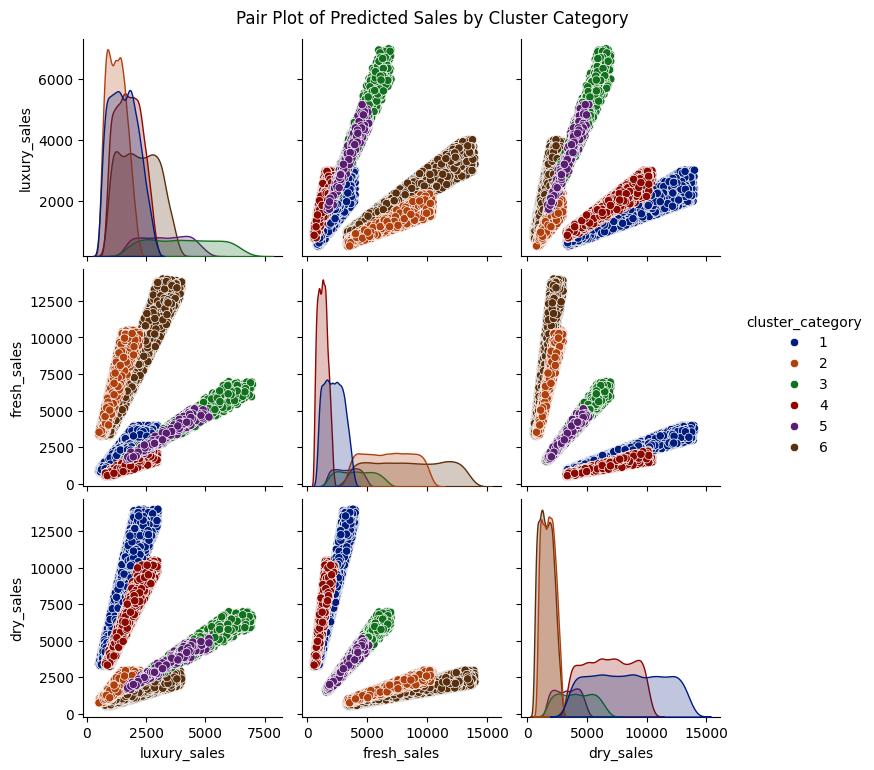

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sales_columns = ['luxury_sales', 'fresh_sales', 'dry_sales']


sns.pairplot(test_df[sales_columns + ['cluster_category']], hue='cluster_category', palette='dark')

plt.suptitle("Pair Plot of Predicted Sales by Cluster Category", y=1.02)
plt.show()

<ipython-input-29-3c6cd232906a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=test_df, x='cluster_category', y=col, ax=axes[i], palette='Set2')
<ipython-input-29-3c6cd232906a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=test_df, x='cluster_category', y=col, ax=axes[i], palette='Set2')
<ipython-input-29-3c6cd232906a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=test_df, x='cluster_category', y=col, ax=axes[i], palette='Set2')


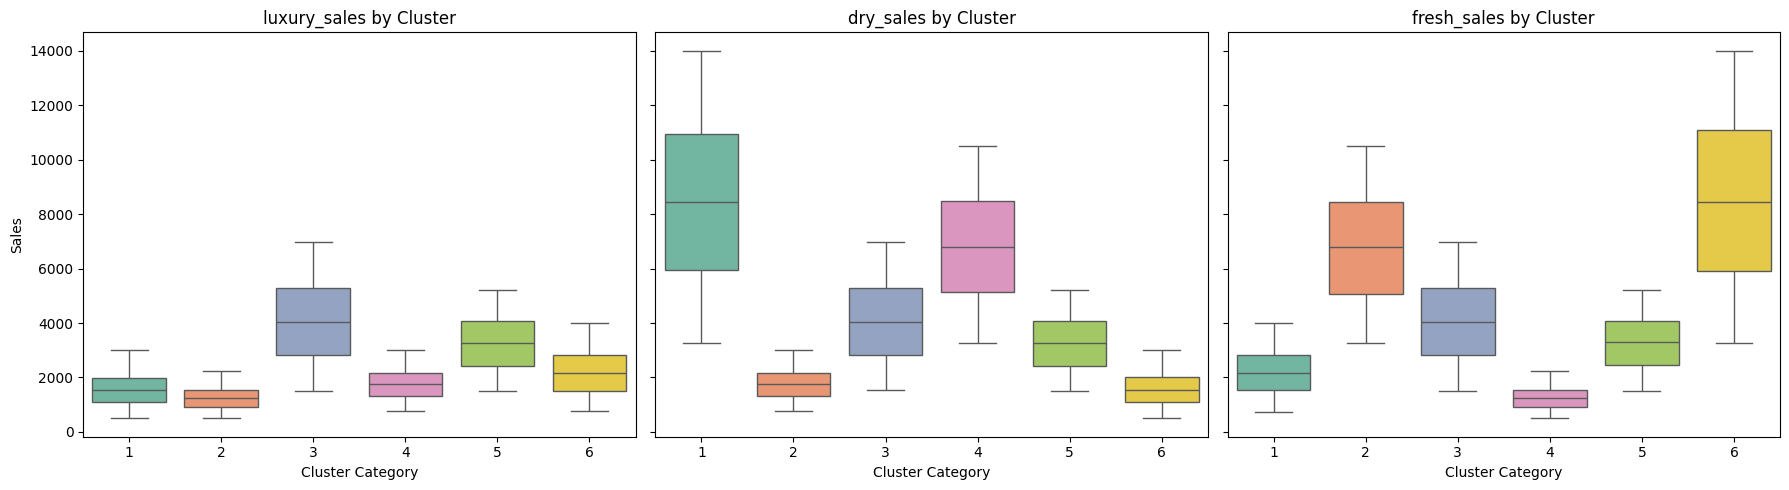

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sales_columns = ['luxury_sales', 'dry_sales', 'fresh_sales']


fig, axes = plt.subplots(1, len(sales_columns), figsize=(6 * len(sales_columns), 5), sharey=True)

for i, col in enumerate(sales_columns):
    sns.boxplot(data=test_df, x='cluster_category', y=col, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{col} by Cluster')
    axes[i].set_xlabel('Cluster Category')
    axes[i].set_ylabel('Sales')

plt.tight_layout()
plt.show()


Cluster 1: High Dry Goods Consumption Segment

Cluster 2: Moderate Fresh Produce Engagement Segment

Cluster 3: Balanced Consumption Portfolio

Cluster 4: Dominant Dry Goods Purchase Group

Cluster 5: Emerging Luxury and Fresh Preference Group

Cluster 6: High Fresh Produce Consumption Segment

In [ ]:
from sklearn.metrics import accuracy_score


if predictions_df is not None:

    accuracy = accuracy_score(testing['cluster_category'], predictions_df['cluster_category'])
    print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00
